In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

file_path = '/kaggle/input/news-dataset/news_classification_cleaned.csv'
df = pd.read_csv(file_path) 

df

,Title,Date,Views,Label,Tokenized_sentence
0,คนไทยเฮ รัฐบาลจัดให้ หยุดยาวปีใหม่ 5 วัน,15 ต.ค. 56,"90,604",การเมือง,"['คน', 'ไทย', 'เฮ', 'รัฐบาล', 'จัด', 'ให้', 'ห..."
1,เอาฮาไปไหน เมื่อ ชาวเน็ต เปลี่ยนมอเตอร์ไซค์ให้...,3 มี.ค. 58,"67,528",การเมือง,"['เอา', 'ฮา', 'ไป', 'ไหน', 'เมื่อ', 'ชาว', 'เน..."
2,เลือกตั้ง 2562 ธนาธรไม่รอด กกต มีมติแจ้งข้อหา ...,23 เม.ย. 62,"53,661",การเมือง,"['เลือกตั้ง', '2562', 'ธนาธร', 'ไม่', 'รอด', '..."
3,ปารีณา ไกรคุปต์ คือใคร โซเชียลสืบประวัติไม่ธรร...,29 พ.ค. 62,"115,286",การเมือง,"['ปารีณา', 'ไกรคุปต์', 'คือ', 'ใคร', 'โซเชียล'..."
4,เปิดโผรัฐมนตรี รัฐบาลยิ่งลักษณ์,9 ส.ค. 54,"101,279",การเมือง,"['เปิด', 'โผ', 'รัฐมนตรี', 'รัฐบาล', 'ยิ่งลักษ..."
...,...,...,...,...,...
11659,ออกหมายจับ 2 มือเผาทั้งเป็น หนุ่ม 18 ผู้เป็นย่...,29 ธ.ค. 57,"149,761",อาชญากรรม,"['ออก', 'หมาย', 'จับ', '2', 'มือ', 'เผา', 'ทั้..."
11660,ด่วน กระติก รับสารภาพแล้วให้การเท็จ เตรียมนำตั...,4 เม.ย. 65,"252,799",อาชญากรรม,"['ด่วน', 'กระติก', 'รับ', 'สารภาพ', 'แล้ว', 'ใ..."
11661,สลด เด็กหญิงผูกคอดับประชดรัก หลังโพสต์ภาพลงโซเ...,25 มี.ค. 59,"118,659",อาชญากรรม,"['สลด', 'เด็ก', 'หญิง', 'ผูก', 'คอ', 'ดับ', 'ป..."
11662,นิติกรหนุ่มขอเงินไม่ได้ ยิงพี่เขยดับต่อหน้าพี่สาว,2 ก.ย. 56,"408,487",อาชญากรรม,"['นิติกร', 'หนุ่ม', 'ขอ', 'เงิน', 'ไม่', 'ได้'..."


In [4]:
from transformers import BertTokenizer, BertModel
# Initialize the BERT tokenizer
from transformers import DistilBertTokenizer, DistilBertModel
from transformers import AutoTokenizer, AutoModelForTokenClassification
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df['Title'], df['Label'], test_size=0.2, random_state=42)  # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% val, 10% test

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("KoichiYasuoka/bert-base-thai-upos")

def tokenize_data(texts, tokenizer, max_length=256):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoding = tokenizer(text, max_length=max_length, padding='max_length', truncation=True, return_tensors="pt")
        input_ids.append(encoding['input_ids'].squeeze(0))  # Remove batch dimension
        attention_masks.append(encoding['attention_mask'].squeeze(0))
    
    return {
        'input_ids': torch.stack(input_ids),  # Convert list of tensors to tensor
        'attention_mask': torch.stack(attention_masks)
    }
# Tokenize your train, val, and test sets
train_encodings = tokenize_data(X_train.tolist(), tokenizer)  # Assuming 'Text' contains your input text
val_encodings = tokenize_data(X_val.tolist(), tokenizer)
test_encodings = tokenize_data(X_test.tolist(),tokenizer)


tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/47.7k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader

class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

label_mapping = {'การเมือง': 0, 'ข่าวการเงิน': 1, 'ข่าวกีฬา': 2, 'ข่าวบันเทิง': 3, 'ข่าวรถยนต์': 4, 'ข่าวเกมส์':5,
                'ข่าวไอที':6, 'ดูดวง':7, 'สุขภาพ':8, 'อาชญากรรม':9}

train_labels = torch.tensor([label_mapping[label] for label in y_train])
val_labels = torch.tensor([label_mapping[label] for label in y_val])
test_labels = torch.tensor([label_mapping[label] for label in y_test])

# Create datasets
train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# for batch in train_loader:
#     print(batch)
#     break
for batch in train_loader:
    print(batch)
    print(batch['input_ids'].shape)
    print(batch['labels'].shape)
    break


{'input_ids': tensor([[  11,   34,  185,  ...,    0,    0,    0],
        [  11,  179, 2930,  ...,    0,    0,    0],
        [  11,  140, 7262,  ...,    0,    0,    0],
        ...,
        [  11,  154, 5671,  ...,    0,    0,    0],
        [  11,  166, 2930,  ...,    0,    0,    0],
        [  11,  176, 2617,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([8, 5, 1, 4, 0, 4, 4, 6, 2, 3, 5, 1, 3, 7, 5, 5])}
torch.Size([16, 256])
torch.Size([16])


config.json:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at KoichiYasuoka/bert-base-thai-upos and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 584/584 [06:38<00:00,  1.46it/s]


Epoch 1/5, Train Loss: 1.5330, Train Accuracy: 0.4639, Validation Loss: 0.8363, Validation Accuracy: 0.7453


100%|██████████| 584/584 [06:43<00:00,  1.45it/s]


Epoch 2/5, Train Loss: 0.7456, Train Accuracy: 0.7647, Validation Loss: 0.6163, Validation Accuracy: 0.8062


100%|██████████| 584/584 [06:43<00:00,  1.45it/s]


Epoch 3/5, Train Loss: 0.5198, Train Accuracy: 0.8409, Validation Loss: 0.5609, Validation Accuracy: 0.8379


100%|██████████| 584/584 [06:42<00:00,  1.45it/s]


Epoch 4/5, Train Loss: 0.3922, Train Accuracy: 0.8819, Validation Loss: 0.5097, Validation Accuracy: 0.8465


100%|██████████| 584/584 [06:44<00:00,  1.45it/s]


Epoch 5/5, Train Loss: 0.3009, Train Accuracy: 0.9117, Validation Loss: 0.5478, Validation Accuracy: 0.8465


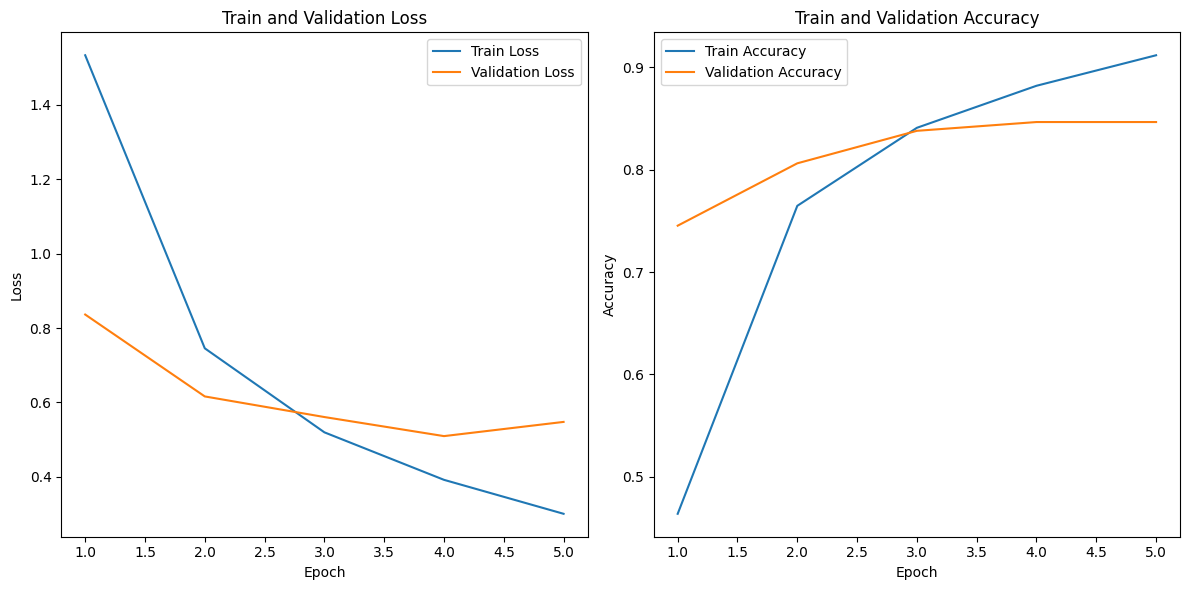

In [6]:
import matplotlib.pyplot as plt
from transformers import AdamW, AutoModelForTokenClassification
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import AutoModel

# Create a Classifier Model with Dropout
class BertClassifier(nn.Module):
    def __init__(self, num_classes, dropout_rate):
        super(BertClassifier, self).__init__()
        # Use AutoModel (not AutoModelForTokenClassification)
        self.bert = AutoModel.from_pretrained("KoichiYasuoka/bert-base-thai-upos",num_labels=10, ignore_mismatched_sizes=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)
    
    def forward(self, input_ids, attention_mask):
        # Get outputs from BERT
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # Get the [CLS] token embedding
        
        # Apply dropout after BERT output
        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)
        return logits

# Set device (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Number of classes
num_classes = 10  # Adjust this according to your dataset

# Create the model
model = BertClassifier(num_classes, dropout_rate=0.5).to(device)  # Add dropout rate

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 5

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Lists to store train and validation loss/accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training
for epoch in range(num_epochs):
    model.train()
    train_loss = 0  # Track training loss per epoch
    correct_train_predictions = 0  # Track correct predictions for training accuracy
    
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        
        # Unpack the batch dictionary
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)  # Ensure you also get the labels
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        
        # Calculate loss
        loss = loss_fn(outputs.view(-1, num_classes), labels.view(-1))  # Reshape outputs and labels for loss calculation
        
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        # Accumulate loss and accuracy
        train_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct_train_predictions += (preds == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = correct_train_predictions / len(train_dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validate on the validation set
    model.eval()
    val_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            val_loss += loss_fn(outputs.view(-1, num_classes), labels.view(-1)).item()  # Reshape outputs and labels
            preds = outputs.argmax(dim=1)
            correct_predictions += (preds == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    accuracy = correct_predictions / len(val_dataset)
    val_accuracies.append(accuracy)

    # Print epoch results
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.4f}')

# Plot the losses and accuracies
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import classification_report

# Put model in evaluation mode
model.eval()

# Store true and predicted labels
true_labels = []
predicted_labels = []

# No need to calculate gradients for validation
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass to get logits
        logits = model(input_ids=input_ids, attention_mask=attention_mask)

        # Get the predicted class (the class with the highest score)
        predictions = torch.argmax(logits, dim=-1)

        # Append true and predicted labels
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Generate classification report
report = classification_report(
    true_labels, 
    predicted_labels, 
    target_names=['การเมือง', 'ข่าวการเงิน', 'ข่าวกีฬา', 'ข่าวบันเทิง', 
                  'ข่าวรถยนต์', 'ข่าวเกมส์', 'ข่าวไอที', 'ดูดวง', 
                  'สุขภาพ', 'อาชญากรรม']
)
print(report)

              precision    recall  f1-score   support

    การเมือง       0.82      0.82      0.82       113
 ข่าวการเงิน       0.86      0.84      0.85       104
    ข่าวกีฬา       0.98      0.85      0.91       127
 ข่าวบันเทิง       0.84      0.73      0.78       125
  ข่าวรถยนต์       0.87      0.87      0.87       113
   ข่าวเกมส์       0.95      0.90      0.93       124
    ข่าวไอที       0.87      0.87      0.87       132
       ดูดวง       0.91      0.86      0.89       103
      สุขภาพ       0.86      0.96      0.91       112
   อาชญากรรม       0.69      0.90      0.78       114

    accuracy                           0.86      1167
   macro avg       0.87      0.86      0.86      1167
weighted avg       0.87      0.86      0.86      1167



In [9]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Example tokenization function
def tokenize_data(texts, tokenizer, max_length=256):
    tokenized_data = []
    for text in texts:
        encoding = tokenizer(text, max_length=max_length, padding='max_length', truncation=True, return_tensors="pt")
        tokenized_data.append({
            'input_ids': encoding['input_ids'].squeeze(0),  # Remove batch dimension
            'attention_mask': encoding['attention_mask'].squeeze(0)
        })
    return tokenized_data

new_texts = [
    # politics
    "รวมไทยสร้างชาติ โต้ “สนธิญาณ” ไม่ได้ทรยศจิตวิญญาณ “ลุงตู่” แก้ รธน. ยึดหลักเกณฑ์เดิม",
    "โปรดเกล้าฯ พล.ต.อ.กิตติ์รัฐ พันธุ์เพ็ชร์ เป็น ผบ.ตร. คนที่ 15",
    "“อนุสรณ์” มั่นใจ เพื่อไทยแจงได้ ไม่กังวลถูกยื่นยุบพรรค ปม “ทักษิณ” ครอบงำ",
    # crime
    "รวบ เจ้าหน้าที่รัฐ อดีตชุดปฏิบัติการพิเศษ ลักทรัพย์เงินหลวงกว่า 10 ล้าน หลบหนี",
    "จับสาวหลอกขายประกัน เจ้าอาวาส หลังซื้อให้โยมแม่ สารภาพนำเงินค่าเบี้ยไปใช้เอง",
    "กสม.ชี้คดี สารวัตรกานต์ ตร.ชุดระงับเหตุ ละเมิดสิทธิมนุษยชน",
    # Entertainment
    "ปังไม่หยุด ลิซ่า เปิดตัวเพลง Moonlit Floor ในเทศกาลดนตรี",
    "เกิดอะไรขึ้น แจง เมียแจ๊ส ประกาศขายคอนโดหรู ราคาสูง ใครเห็นก็เสียดายแทน",
    "แจ็ค-ใบหม่อน เผยชื่อจริง น้องคากิ ที่ หมอช้าง ตั้งให้ พร้อมเผยความหมาย",
    # Sport
    "แฟนบอลสงขลาแห่ซื้อตั๋วชมคิงส์คัพ ไทย - ฟิลิปปินส์",
    "คึกคัก แฟนบอลร่วมชมแข้งทีมชาติฝึกซ้อม เตรียมสู้ศึกคิงส์ คัพ ครั้งที่ 50",
    "“ช้างศึก” พ่าย “ฝรั่งเศส” 2-5 ตกรอบ 16 ทีม ศึกฟุตซอลชิงแชมป์โลก 2024",
    #health
    "อย่าหาทำ! 7 ความเชื่อผิด ๆ สำหรับคุณแม่หลังคลอด",
    "ครั้งแรกในไทย! พบหมู่โลหิตพิเศษ Rh+(Asian-type DEL) สภากาชาด ชวนปชช. หมู่เลือด Rh- บริจาคโลหิตคัดกรอง Rh+",
    "อย. ตรวจพบ ซิลเดนาฟิล ในอาหารเสริมแบรนด์ดัง เสี่ยงอันตรายถึงขั้นเสียชีวิต",
    #horoscope
    "แรงดาววิปริต เตือน 4 ราศี ตั้งแต่ 19 ตุลาคม นี้ มีหลายเรื่องต้องระมัดระวัง",
    "หมอช้าง เปิดราศี ช่วง 3 เดือนสุดท้าย ราศีพ้นเคราะห์ ราศีดวงแรง ราศีระวังอุบัติเหตุ",
    "ดูดวงราศี ดาวศุกร์ย้ายส่งผลดี เรื่องร้ายคลี่คลาย มีเกณฑ์รวยติดจรวด ได้เงินคืนมา",
    #car
    "ตารางผ่อน Mitsubishi Triton Athlete 2024-2025 กระบะตัวแต่งยกสูง",
    "รถไฟฟ้า Tesla รีวิวทุกรุ่นในไทย ราคาเท่าไหร่ รุ่นไหนน่าสนใจบ้าง",
    "วิธีเช็ครถก่อนเดินทางไกลง่ายๆ ด้วยตัวเอง",
    #it
    "ยืนยัน ! iPad mini (2024) มาพร้อมแรม 8 GB: จากการทดสอบบน Geekbench",
    "Honor เปิดตัว X7c ขุมพลัง Snapdragon 4 Gen 2, กล้อง 108 ล้านพิกเซล, แบตเตอรี่ 6,000 mAh",
    "นักวิจัยจีนใช้คอมพิวเตอร์ควอนตัมเจาะระบบการเข้ารหัส SPN ที่ใช้แพร่หลายในปัจจุบันได้สำเร็จ",
    #games
    "คำสั่ง Minecraft ที่เป็นประโยชน์ต่อการเล่น และควบคุมเซิร์ฟเวอร์",
    "อดีตผู้บริหาร PlayStation มองว่าการแข่งขันเรื่องความแรงของคอนโซล มาถึงจุดอิ่มตัวแล้ว และผู้ชนะคือ AMD",
    "รวมสูตรโกง GTA V ใน PC และ Console อัพเดทใหม่",
    #finance
    "ออมสิน - ธอส. ลดดอกเบี้ยกู้ 0.25% มีผล 1 พ.ย. แต่ยังตรึงดอกเบี้ยเงินฝากส่งเสริมการออม",
    "รมว.คลัง ถกเรื่องดอกเบี้ยกับแบงก์ชาติสัปดาห์หน้า- “เผ่าภูมิ” ระบุ ต้องดูกรอบเงินเฟ้อประกอบ",
    "การเงินติดลบ-เน้นใช้จ่ายคุ้มค่า ไลน์-นีลเส็น เผยคนไทยติดแบรนด์ลดลง"
]

# Categories for predictions
categories = ['การเมือง', 'ข่าวการเงิน', 'ข่าวกีฬา', 'ข่าวบันเทิง', 'ข่าวรถยนต์', 'ข่าวเกมส์', 'ข่าวไอที', 'ดูดวง', 'สุขภาพ', 'อาชญากรรม']

new_test = tokenize_data(new_texts, tokenizer)

# Create DataLoader
new_test_loader = DataLoader(new_test, batch_size=16)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to device
model.eval()  # Set model to evaluation mode

# Begin prediction
with torch.no_grad():
    for idx, batch in enumerate(new_test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # Forward pass to get logits
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        if hasattr(outputs, "logits"):
            logits = outputs.logits
        else:
            logits = outputs 
        probabilities = F.softmax(logits, dim=-1)
        for i, probs in enumerate(probabilities):
            text = new_texts[idx * new_test_loader.batch_size + i]
    
            # แสดงเปอร์เซ็นต์ความน่าจะเป็นในรูปแบบทศนิยม 2 ตำแหน่ง
            category_probs = {categories[j]: f"{probs[j] * 100:.2f}%" for j in range(len(categories))}
    
            predicted_category = categories[torch.argmax(probs)]
            print(f"ข้อความ: '{text}' => หมวดหมู่: {predicted_category}")
            print(f"เปอร์เซ็นต์ความน่าจะเป็นของแต่ละหมวดหมู่: {category_probs}")
            print("="*50)


ข้อความ: 'รวมไทยสร้างชาติ โต้ “สนธิญาณ” ไม่ได้ทรยศจิตวิญญาณ “ลุงตู่” แก้ รธน. ยึดหลักเกณฑ์เดิม' => หมวดหมู่: การเมือง
เปอร์เซ็นต์ความน่าจะเป็นของแต่ละหมวดหมู่: {'การเมือง': '98.27%', 'ข่าวการเงิน': '0.91%', 'ข่าวกีฬา': '0.04%', 'ข่าวบันเทิง': '0.15%', 'ข่าวรถยนต์': '0.02%', 'ข่าวเกมส์': '0.08%', 'ข่าวไอที': '0.11%', 'ดูดวง': '0.07%', 'สุขภาพ': '0.07%', 'อาชญากรรม': '0.28%'}
ข้อความ: 'โปรดเกล้าฯ พล.ต.อ.กิตติ์รัฐ พันธุ์เพ็ชร์ เป็น ผบ.ตร. คนที่ 15' => หมวดหมู่: การเมือง
เปอร์เซ็นต์ความน่าจะเป็นของแต่ละหมวดหมู่: {'การเมือง': '97.79%', 'ข่าวการเงิน': '0.29%', 'ข่าวกีฬา': '0.05%', 'ข่าวบันเทิง': '0.40%', 'ข่าวรถยนต์': '0.02%', 'ข่าวเกมส์': '0.03%', 'ข่าวไอที': '0.03%', 'ดูดวง': '0.10%', 'สุขภาพ': '0.03%', 'อาชญากรรม': '1.27%'}
ข้อความ: '“อนุสรณ์” มั่นใจ เพื่อไทยแจงได้ ไม่กังวลถูกยื่นยุบพรรค ปม “ทักษิณ” ครอบงำ' => หมวดหมู่: การเมือง
เปอร์เซ็นต์ความน่าจะเป็นของแต่ละหมวดหมู่: {'การเมือง': '99.38%', 'ข่าวการเงิน': '0.09%', 'ข่าวกีฬา': '0.03%', 'ข่าวบันเทิง': '0.07%', 'ข่าวรถยนต์': '0.01%', 'ข่าว